In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('data.csv', parse_dates =['date'], dayfirst=True, index_col='date', sep=';').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-31 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tax     72 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [19]:
df['tax'] = df['tax'].astype(str).str.replace(',', '.')

In [20]:
df

,tax
date,
2018-01-31,1.6
2018-02-28,2.7
2018-03-31,2.7
2018-04-30,2.7
2018-05-31,2.3
...,...
2023-08-31,4.2
2023-09-30,4.2
2023-10-31,4.0


In [23]:
df['tax'] = df['tax'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-31 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tax     72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


<AxesSubplot: xlabel='date'>

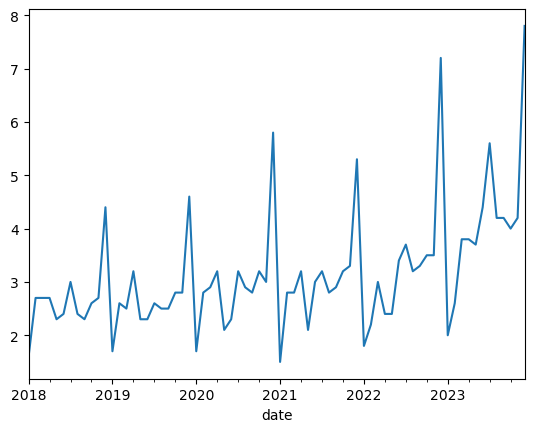

In [69]:
df.plot(legend=False)

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.statespace.sarimax import SARIMAX  

In [29]:
adfuller(df)

(4.391181508500236,
 1.0,
 11,
 60,
 {'1%': -3.5443688564814813,
  '5%': -2.9110731481481484,
  '10%': -2.5931902777777776},
 93.42533708237706)

not stat

In [31]:
adfuller(df.diff(1).dropna())

(-1.7616972593495335,
 0.3996368079678067,
 12,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 88.10330289391923)

not stat

In [32]:
adfuller(df.diff(1).diff(1).dropna())

(-9.672015186988727,
 1.2694831709342775e-16,
 11,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 90.05654310464564)

stat

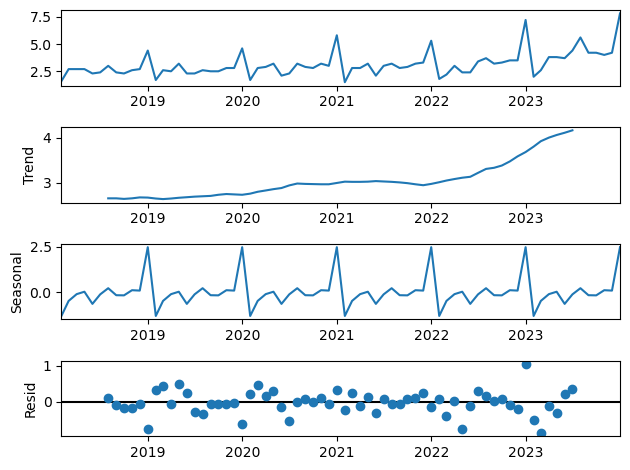

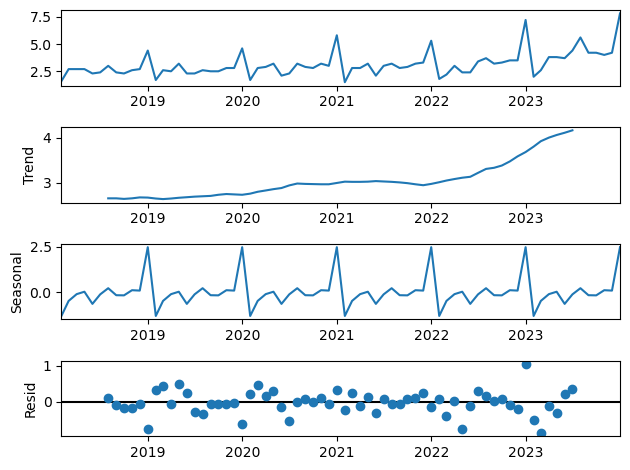

In [39]:
seasonal_decompose(df, period=12).plot()

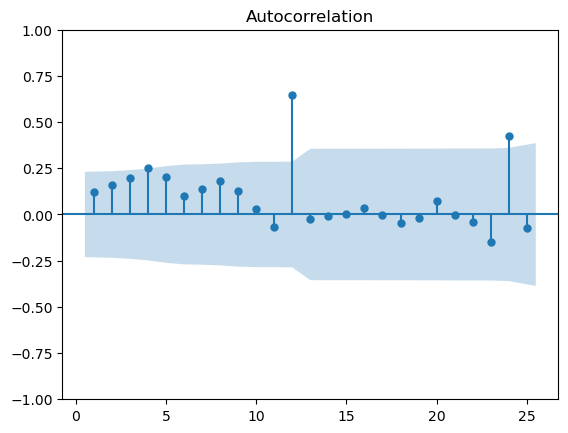

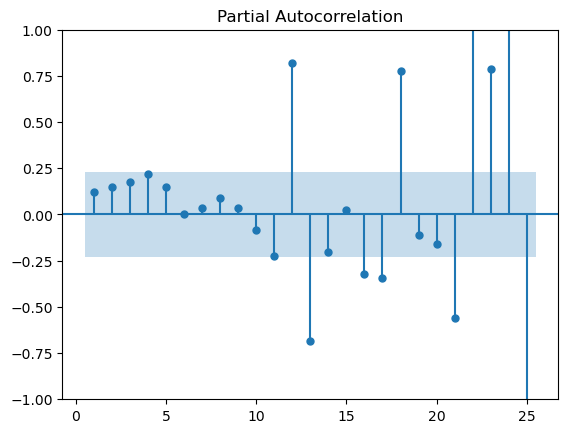

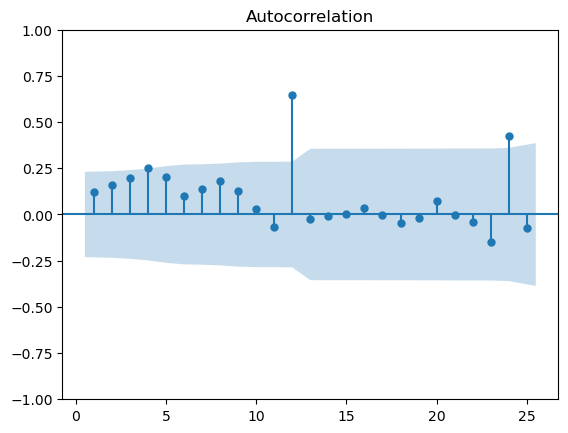

In [36]:
plot_pacf(df, zero=False,lags=25)
plot_acf(df, zero=False, lags=25)

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


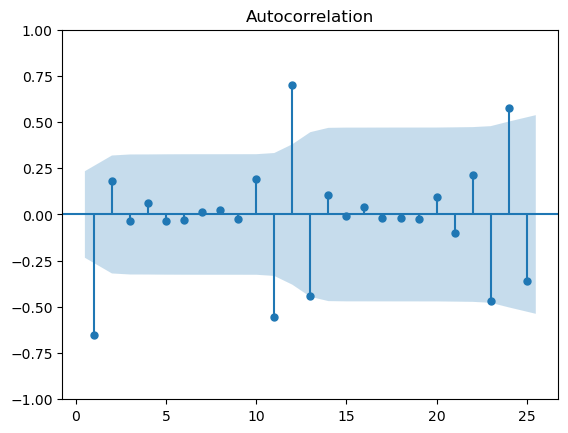

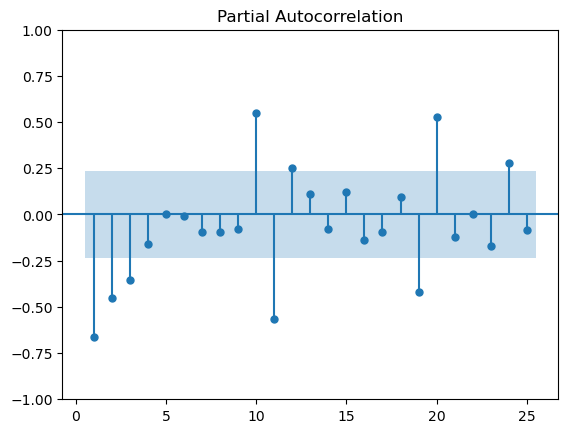

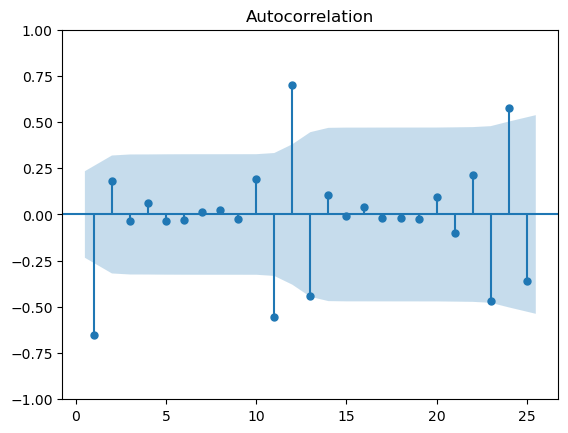

In [37]:
plot_pacf(df.diff(1).diff(1).dropna(), zero=False,lags=25)
plot_acf(df.diff(1).diff(1).dropna(), zero=False, lags=25)

In [40]:
pip install pmdarima

  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pmdarima as pm 

In [42]:
results = pm.auto_arima( df,             # data  
                         d=2,            # non-seasonal difference order  
                         start_p=3,      # initial guess for p 
                         start_q=0,      # initial guess for q  
                         max_p=11,        # max value of p to test 
                         max_q=3,        # max value of q to test 
                         seasonal=True,  # is the time series seasonal  
                         m=12,            # the seasonal period  
                         D=1,            # seasonal difference order  
                         start_P=1,      # initial guess for P 
                         start_Q=0,      # initial guess for Q  
                         max_P=10,        # max value of P to test 
                         max_Q=10,        # max value of Q to test 
                         information_criterion='aic', # used to select best model  
                         trace=True,             # print results whilst training  
                         error_action='ignore',  # ignore orders that don't work  
                         stepwise=True          # apply intelligent order search 
                       )

Performing stepwise search to minimize aic
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=107.005, Time=0.39 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=169.607, Time=0.17 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=125.238, Time=0.31 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=106.424, Time=0.12 sec
 ARIMA(3,2,0)(0,1,1)[12]             : AIC=107.439, Time=0.50 sec
 ARIMA(3,2,0)(1,1,1)[12]             : AIC=107.257, Time=1.80 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=117.933, Time=0.19 sec
 ARIMA(4,2,0)(0,1,0)[12]             : AIC=97.050, Time=0.05 sec
 ARIMA(4,2,0)(1,1,0)[12]             : AIC=98.890, Time=0.87 sec
 ARIMA(4,2,0)(0,1,1)[12]             : AIC=98.951, Time=0.69 sec
 ARIMA(4,2,0)(1,1,1)[12]             : AIC=inf, Time=3.69 sec
 ARIMA(5,2,0)(0,1,0)[12]             : AIC=97.904, Time=0.14 sec
 ARIMA(4,2,1)(0,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(3,2,1)(0,1,0)[12]             : AIC=inf, T

In [43]:
model = SARIMAX(df, order=(4,2,0), seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04968D-01    |proj g|=  4.95970D-02

At iterate    5    f=  6.04519D-01    |proj g|=  2.93560D-03

At iterate   10    f=  6.04515D-01    |proj g|=  5.56999D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   5.570D-06   6.045D-01
  F =  0.60451499486316651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                tax   No. Observations:                   72
Model:             SARIMAX(4, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -43.525
Date:                            Sun, 04 Aug 2024   AIC                             97.050
Time:                                    18:44:17   BIC                            107.352
Sample:                                01-31-2018   HQIC                           101.063
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4169      0.110    -12.859      0.000      -1.633      -1.201
ar.L2         -1.2570      0.214     -5.869      0.000      -1.677      -0.837
ar.L3         -0.9822      0.204     -4.815      0.000      -1.382      -0.582
ar.L4         -0.4244      0.114     -3.725      0.000      -0.648      -0.201
sigma2         0.2509      0.040      6.267      0.000       0.172       0.329
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 6.78
Prob(Q):                              0.54   Prob(JB):                         0.03
Heteroskedasticity (H):               3.72   Skew:                             0.65
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

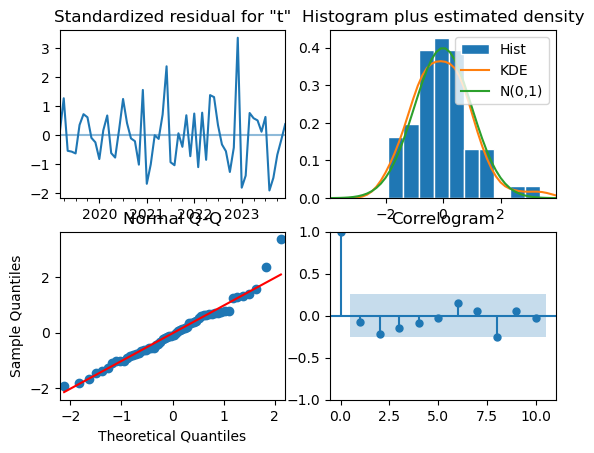

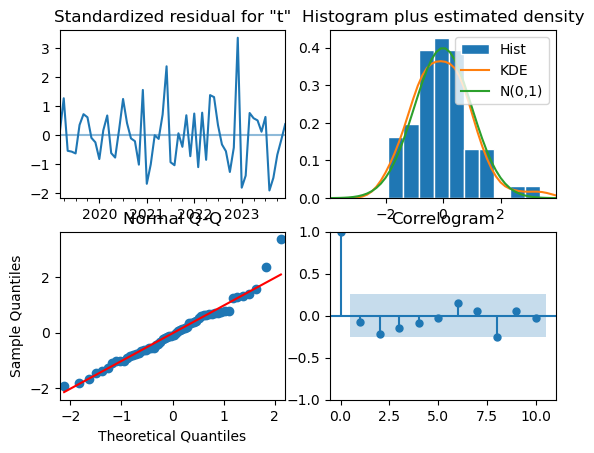

In [45]:
results.plot_diagnostics()

In [55]:
def change_neg(c):
    if c<0:
        c=0
    return round(c,1)

In [62]:
forecast=results.get_prediction(start=-12, end=len(df)+11)
predicted_mean=forecast.predicted_mean.apply(change_neg).round(1)
confidence_intervals = forecast.conf_int()
for column in confidence_intervals.columns:
    confidence_intervals[column] = confidence_intervals[column].apply(change_neg).round(1)

confidence_intervals

,lower tax,upper tax
2023-01-31,1.9,3.9
2023-02-28,2.3,4.3
2023-03-31,2.4,4.4
2023-04-30,2.5,4.5
2023-05-31,2.5,4.4
2023-06-30,3.4,5.3
2023-07-31,4.3,6.3
2023-08-31,4.2,6.1
2023-09-30,4.0,5.9
2023-10-31,3.4,5.3


In [63]:
predicted_mean

2023-01-31    2.9
2023-02-28    3.3
2023-03-31    3.4
2023-04-30    3.5
2023-05-31    3.4
2023-06-30    4.3
2023-07-31    5.3
2023-08-31    5.2
2023-09-30    4.9
2023-10-31    4.3
2023-11-30    4.3
2023-12-31    7.6
2024-01-31    2.1
2024-02-29    2.7
2024-03-31    3.7
2024-04-30    3.7
2024-05-31    3.3
2024-06-30    3.9
2024-07-31    4.9
2024-08-31    3.4
2024-09-30    3.2
2024-10-31    2.8
2024-11-30    2.9
2024-12-31    6.3
Freq: M, Name: predicted_mean, dtype: float64

In [57]:
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

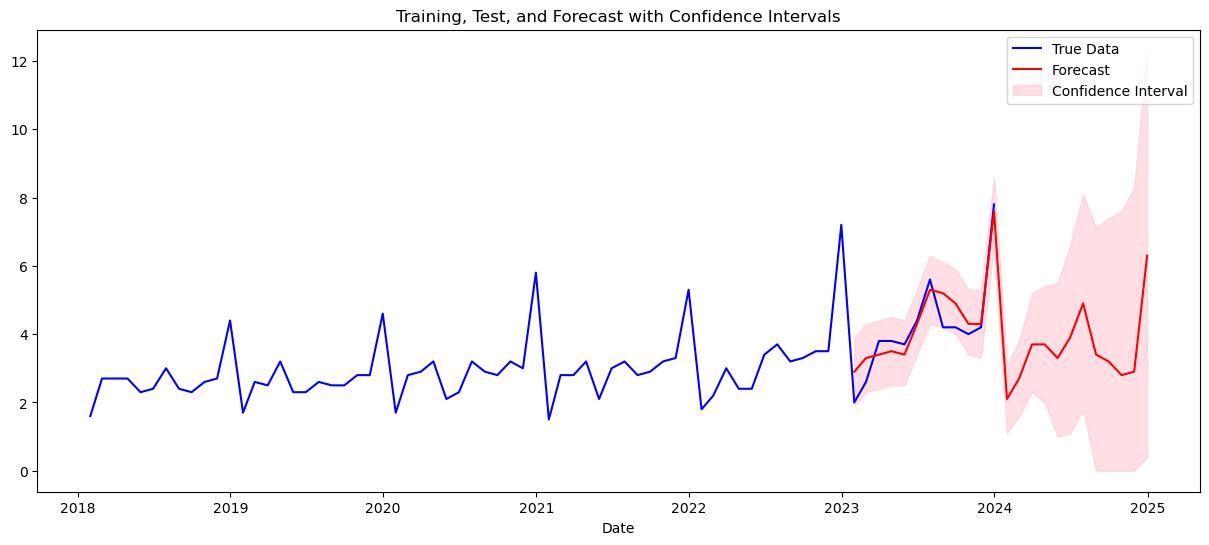

In [58]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['tax'], color='blue', label='True Data')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Forecast')

plt.fill_between(predicted_mean.index, lower_limits, upper_limits, color='pink', alpha=0.5, label='Confidence Interval')

# Add labels and title
plt.xlabel('Date')
plt.title('Training, Test, and Forecast with Confidence Intervals')

# Show legend
plt.legend()
plt.show()